# Project:  Food Classification Convoltional Neural Network

In [39]:
#import libaries

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, Activation, MaxPool2D

import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K

import os
from shutil import copyfile


# Splitting data into train and test
The dataset contained .txt files containing names of all test/train files as well as a classes files for the categories. We editted the .txt files to only include the classes of the 20 categories we wanted and the files of each class

In [40]:
## move files to train and test folders

## make train and test directories
with open('food41/meta/classes.txt', 'r') as fp:
    line = fp.readline()
    while line:
        line = line.strip()
        try:
            os.makedirs('train/'+line)
        except FileExistsError:
            # directory already exists
            pass
        try:
            os.makedirs('test/'+line)
        except FileExistsError:
            # directory already exists
            pass
        line = fp.readline()


with open('food41/meta/train.txt', 'r') as fp:
    line = fp.readline()
    while line:
        line = line.strip()
        src = 'food41/images/' + line + '.jpg'
        dst = 'train/' + line + '.jpg'
        copyfile(src, dst)
#         os.rename(src, dst)
        line = fp.readline()
    

with open('food41/meta/test.txt', 'r') as fp:
    line = fp.readline()
    while line:
        line = line.strip()
        src = 'food41/images/' + line + '.jpg'
        dst = 'test/' + line + '.jpg'
        copyfile(src, dst)
#         os.rename(src, dst)
        line = fp.readline()


In [41]:
nrow = 64
ncol = 64


# Using Generators to Load Data
Fetch images from the test and train directories created previously


In [42]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 15000 images belonging to 20 classes.
Found 5000 images belonging to 20 classes.


# Display Images for minibatch

In [43]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

# Display Images using train_generator.next()
to get minibatch. Display first 8 images. y=0 is apple pie, y=1 is baby back ribs, y=2 is baklava

(64, 64, 3)
20.0


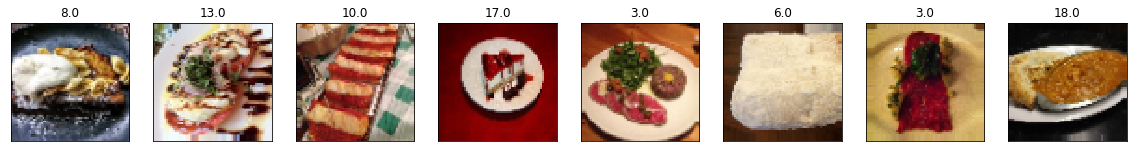

In [44]:
X,y = train_generator.next()
plt.figure(figsize=(20,20))
nplot = 8
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(X[i])
    plt.title(y[i])
print(X.shape[1:])
print(np.max(y)+1)

# Train the model
create new sequential mdel. Add each layer to the model.

In [45]:
# build model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(np.max(y)+1))
model.add(Activation('softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 31, 31, 64)        18496     
__________

# Train Model
compile with RMSProp optimizer, accuracy as metric, and sparse_categorical_crossentropy as loss

In [46]:
# train model
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size
nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/5
469/469 [==============================] - 395s 841ms/step - loss: 2.8256 - acc: 0.1411 - val_loss: 2.4717 - val_acc: 0.2600
Epoch 2/5
469/469 [==============================] - 284s 606ms/step - loss: 2.5476 - acc: 0.2312 - val_loss: 2.2633 - val_acc: 0.2972
Epoch 3/5
469/469 [==============================] - 275s 586ms/step - loss: 2.3890 - acc: 0.2798 - val_loss: 2.1644 - val_acc: 0.3306
Epoch 4/5
469/469 [==============================] - 274s 584ms/step - loss: 2.2790 - acc: 0.3027 - val_loss: 2.1227 - val_acc: 0.3324
Epoch 5/5
469/469 [==============================] - 274s 583ms/step - loss: 2.2127 - acc: 0.3238 - val_loss: 2.0688 - val_acc: 0.3604


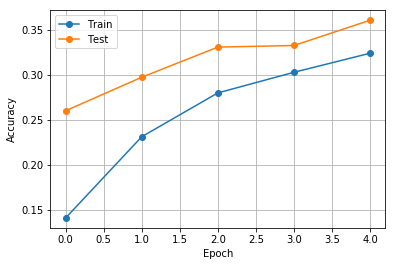

In [48]:
plt.plot(hist.history['acc'], 'o-')
plt.plot(hist.history['val_acc'], 'o-')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

# Plotting the Error Images
Generate a minibatchh that shows images that were in error

c:\users\cz152\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


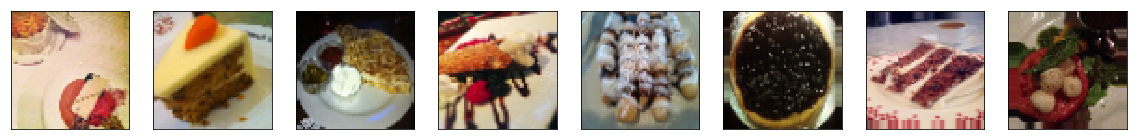

In [49]:
test_generator.reset()
nplot = 8
nfound = 0
Xerr = []
zhat = []
ytrue = []
while (nfound < nplot):
    Xts, yts = test_generator.next()
    z = model.predict(Xts)    
    yhat = (z > 0.5).astype(int).ravel()
    I = np.where(yhat != yts)[0]
    for i in I:
        Xerr.append(Xts[i])
        ytrue.append(yts[i])
        zhat.append(z[i])
        nfound += 1
        

plt.figure(figsize=(20,10))
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(Xerr[i])
    #plt.title('y=%d, p=%7.4f' % (ytrue[i], zhat[i]) )